# Getting started

`uravu` enables the use of powerful Bayesian modelling in Python, building on the capabilities of `emcee` and `dynesty`, for the understanding of some data. 
To show how this can be used, we will create some synthetic data using `numpy`.

In [1]:
import numpy as np

In [2]:
x = np.linspace(0, 9, 10)
y = np.linspace(0, 18, 10) + 2
y += y * np.random.randn((10)) * 0.025
y_err = np.ones((10))

Plotting this data, shows it appears to be a straight line relationship, with some gradient and intercept.

In [3]:
import matplotlib.pyplot as plt

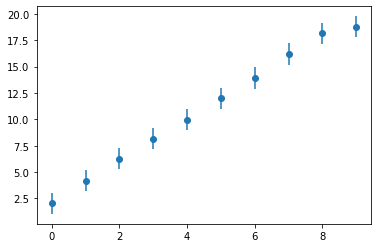

In [4]:
plt.errorbar(x, y, y_err, marker='o', ls='')
plt.show()

Let's use `uravu` to model a straight line function for the data. 

In [5]:
def straight_line(x, m, c):
    """
    A straight line.
    
    Args:
        x (array_like): Abscissa data.
        m (float): Gradient.
        c (float): Intercept.
    
    Returns:
        (array_like): Ordinate data.
    """
    return m * x + c

In [6]:
from uravu.relationship import Relationship

In [7]:
modeller = Relationship(straight_line, x, y, y_err)

This constructs an object of class `Relationship`, we can find out about this object as shown below.

In [8]:
print(modeller)

Function Name: straight_line 
Abscissa: [0.00e+00 1.00e+00 ... 8.00e+00 9.00e+00] 
Ordinate: [2.03e+00 4.16e+00 ... 1.81e+01 1.88e+01] 
Ordinate uncertainty: [1.00e+00 1.00e+00 ... 1.00e+00 1.00e+00]
Abscissa Name: x 
Ordinate Name: y 
Abscissa Unit: dimensionless 
Ordinate Unit: dimensionless 
Variables: 1.00e+00 1.00e+00 
Unaccounted uncertainty: False 
MCMC performed: False 
Nested sampling performed: False 



The `Relationship` class enables substantial functionality, that you can learn about in the [tutorials](./tutorials.html). 
Quickly, we will show the maximisation of the likelihood (there is more about this in the first tutorial).

In [9]:
modeller.max_likelihood()

The built in `plotting` library can be used to make publication quality plot of the `Relationship`.

In [10]:
from uravu import plotting

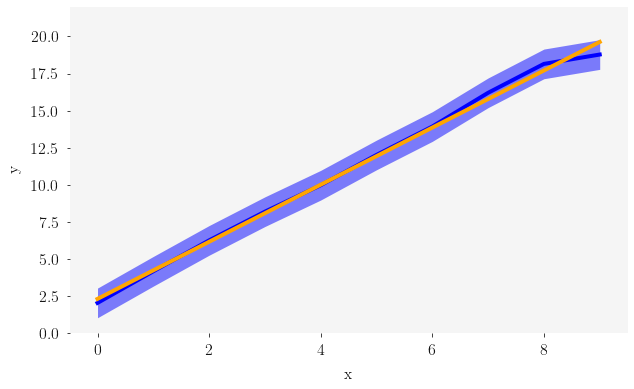

In [11]:
fig, ax = plotting.plot_relationship(modeller)
ax.set_xlim((-0.5, 9.5))
ax.set_ylim((0, 22))
plt.show()

The references associated with a given analysis `Relationship` can be obtained using the `citations` property. Please references these in your publications where `uravu` is used. 

In [12]:
#print(modeller.citations)

We hope you enjoy using `uravu`, feel free to contribute on [Github](https://github.com/arm61/uravu), and tell your friends and colleagues!